## Using SafeDrone for collision risk assessment

SafeDrone can be used for risk of collision of the drones. It takes the trajectory of the drones as an input, and calculates the risk of collision. 

The drone consists of three main electrical components that are essential for its operation.
1. Motor (Rotor)
2. Battery
3. Onboard chip

In the following, we show an example usage of drone collision risk assessment. 

In [1]:
import sys
import os

import inspect

from IPython.display import Markdown as md

from sys import platform
import pandas as pd
import numpy as np
import random

if platform == "linux" or platform == "linux2":
    currentdir = os.path.dirname(os.path.realpath(inspect.getfile(inspect.currentframe())))
    parentdir = os.path.dirname(currentdir)
    sys.path.insert(0, parentdir)
elif platform == "win32":
    # in Windows, the first path entry contains the directory where the notebook is
    sys.path.insert(0, os.path.dirname(sys.path[0]))

from SafeDrones.core.SafeDrones import SafeDrones

In [2]:
eval = SafeDrones()

Initialize the variables . . . .
Use $5$ as collision threshold, and $10$ as danger threshold. GPS lambda can be used the default ($0.001$).

In [3]:
eval.Set_Variables(collision_threshold=5, danger_threshold=10, GPS_Lambda=0.001)

Sample trajectories . . . . 

In [4]:
uav_1_trajectory = [(x, 0, 0) for x in range(10)]
uav_2_trajectory = [(x, 0, x) for x in range(10)]

danger_zone_risk, collision_zone_risk = eval.calculate_collision_risk(uav_1_trajectory, uav_2_trajectory)

print(danger_zone_risk)
print(collision_zone_risk)

1.0
0.5


In [5]:
danger_threshold = 5
collision_threshold = 2

danger_zone_risk, collision_zone_risk = eval.calculate_collision_risk(uav_1_trajectory, uav_2_trajectory, danger_threshold, collision_threshold)

print(danger_zone_risk)
print(collision_zone_risk)

0.5
0.2


To check the risk of GPS failure, let us first set the satellite status. The satellite status is a number between 0 and maximum number of satellites. Let us randomly assign the the status . . . .

In [6]:
sat_status = random.randint(0, 29)
eval.Set_Variables(SatStatus = sat_status)
print("The satellite status is set as : ", sat_status)

The satellite status is set as :  10


In [7]:
GPS_P_Fail, GPS_MTTF = eval.GPS_Failure_Risk_Calc(time=100)
print(GPS_P_Fail)
print(GPS_MTTF)

1
0


In [8]:
GPS_P_Fail, GPS_MTTF = eval.GPS_Failure_Risk_Calc(SatStatus=29, time=100, Lambda = 0.001)
print(GPS_P_Fail)
print(GPS_MTTF)

-2.41226440242013e-5
764.705882352941


In [9]:
GPS_P_Fail, GPS_MTTF = eval.GPS_Failure_Risk_Calc(SatStatus=25, time=100, Lambda = 0.001)
print(GPS_P_Fail)
print(GPS_MTTF)

0.000316029788730011
428.571428571429


In [10]:
GPS_P_Fail, GPS_MTTF = eval.GPS_Failure_Risk_Calc(SatStatus=0, time=100, Lambda = 0.001)
print(GPS_P_Fail)
print(GPS_MTTF)

1
0


In [11]:
%%time
GPS_P_Fail, GPS_MTTF = eval.GPS_Failure_Risk_Calc(SatStatus=27, time=30, Lambda = 0.001, MaxSat = 29, MinSat = 17)
print(GPS_P_Fail)
print(GPS_MTTF)

8.92413011741884e-6
578.947368421053
CPU times: total: 6.92 s
Wall time: 7.1 s


Testing the GPS probability computation on random Satellite status values. . .  . .

100%|██████████| 100/100 [12:15<00:00,  7.36s/it]


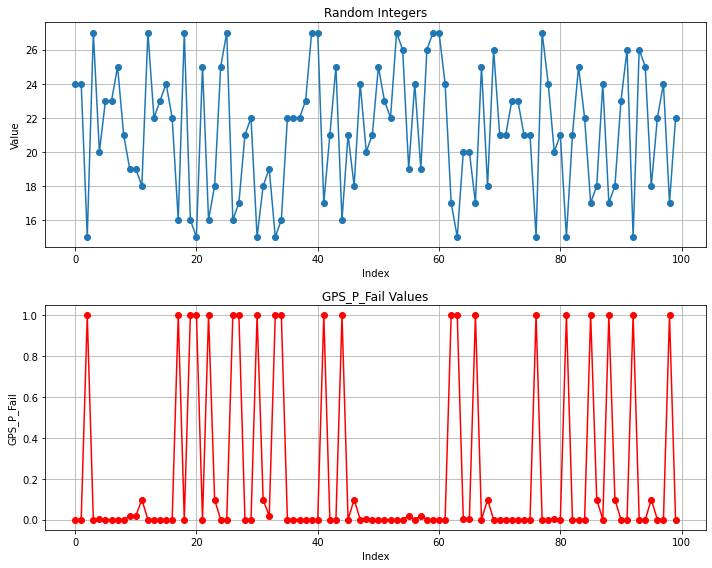

CPU times: total: 11min 45s
Wall time: 12min 18s


In [12]:
%%time
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

random_integers = [random.randint(15, 27) for _ in range(100)]

GPS_P_Fail = []
GPS_MTTF = []

for ii in tqdm(random_integers):
    GPS_P_Fail_temp, GPS_MTTF_temp = eval.GPS_Failure_Risk_Calc(SatStatus=ii, time=30, Lambda = 0.001, MaxSat = 29, MinSat = 17)
    GPS_P_Fail.append(GPS_P_Fail_temp)
    GPS_MTTF.append(GPS_MTTF_temp)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(range(100), random_integers, marker='o', linestyle='-')
axs[0].set_title('Random Integers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].grid(True)

axs[1].plot(range(100), GPS_P_Fail, marker='o', linestyle='-', color='r')
axs[1].set_title('GPS_P_Fail Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('GPS_P_Fail')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Testing the GPS probability computation in the range of satellite status values. .  . . . .

In [13]:
%%time

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

GPS_P_Fail2 = []
GPS_MTTF2 = []

for ii in tqdm(range(18,27)):
    GPS_P_Fail_temp, GPS_MTTF_temp = eval.GPS_Failure_Risk_Calc(SatStatus=ii, time=100, Lambda = 0.001, MaxSat = 29, MinSat = 17)
    GPS_P_Fail2.append(GPS_P_Fail_temp)
    GPS_MTTF2.append(GPS_MTTF_temp)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [01:26<00:00,  9.62s/it]

CPU times: total: 1min 23s
Wall time: 1min 26s


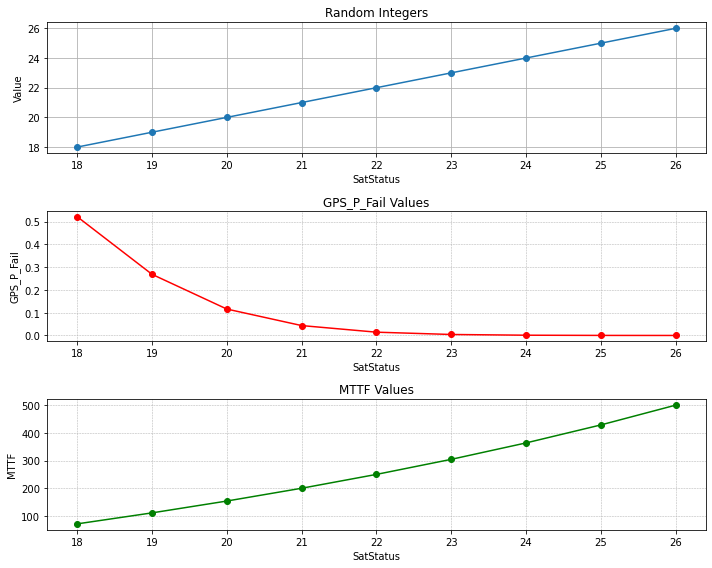

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(range(18,27), range(18,27), marker='o', linestyle='-')
axs[0].set_title('Random Integers')
axs[0].set_xlabel('SatStatus')
axs[0].set_ylabel('Value')
axs[0].grid(True)

axs[1].plot(range(18,27), GPS_P_Fail2, marker='o', linestyle='-', color='r')
axs[1].set_title('GPS_P_Fail Values')
axs[1].set_xlabel('SatStatus')
axs[1].set_ylabel('GPS_P_Fail')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axs[2].plot(range(18,27), GPS_MTTF2, marker='o', linestyle='-', color='g')
axs[2].set_title('MTTF Values')
axs[2].set_xlabel('SatStatus')
axs[2].set_ylabel('MTTF')
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()